In [3]:
import pandas as pd

# Compute Drawdowns

In [4]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",header=0,index_col=0,parse_dates=True,na_values=-99.99)

In [5]:
columns = ['Lo 10','Hi 10']
rets = me_m[columns]
rets = rets / 100
rets.columns = ['SmallCap','LargeCap']

In [ ]:
rets.index = pd.to_datetime(rets.index,format= "%Y%m")

In [12]:
rets.index = rets.index.to_period('M')

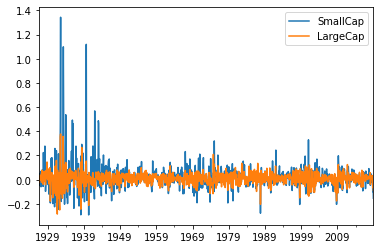

In [14]:
rets.plot.line()

# Compute drawdowns
1. Compute wealth index
2. Compute previous peaks
3. Compute drawdown which is the wealth value as a percentage of the previois week.


In [16]:
wealth_index = 1000* (1+ rets['LargeCap']).cumprod()

In [18]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

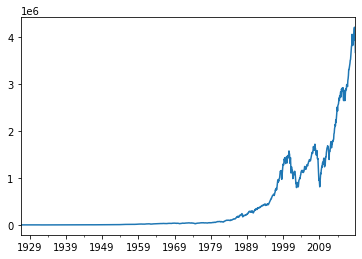

In [19]:
wealth_index.plot.line()

In [20]:
previous_peaks = wealth_index.cummax()

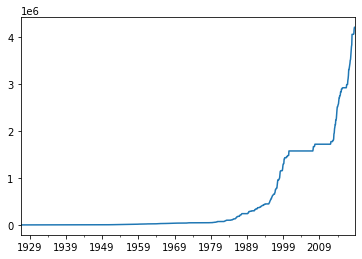

In [21]:
previous_peaks.plot.line()

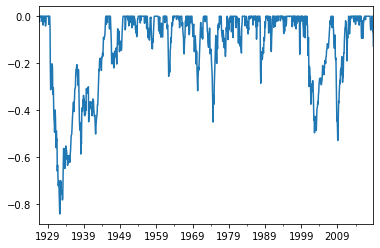

In [22]:
drawdown = (wealth_index - previous_peaks) / previous_peaks
drawdown.plot()

In [23]:
drawdown.min()

-0.8400375277943123

In [25]:
drawdown["1975":].min()
print(drawdown["1975":].idxmin())

2009-02


In [26]:
def drawdown(return_series:pd.Series):
    wealth_index = 1000* (1+ return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdown
    })

In [30]:
drawdown(rets['LargeCap']).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


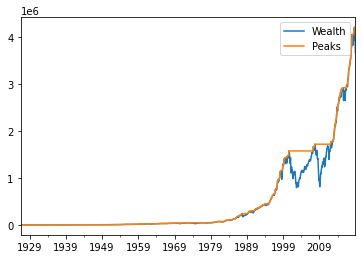

In [32]:
drawdown(rets['LargeCap'])[["Wealth","Peaks"]].plot()

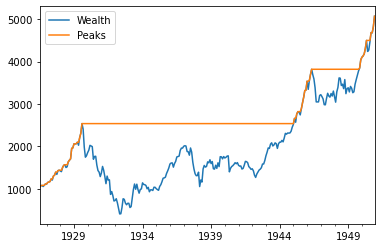

In [33]:
drawdown(rets[:"1950"]['LargeCap'])[["Wealth","Peaks"]].plot()